In [1]:
import numpy as py
import pandas as pd

In [2]:
ds=pd.read_csv("Titanic-Dataset.csv")

In [3]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
ds["Age"].fillna(ds["Age"].mean(),inplace=True)

C:\Users\adesh\AppData\Local\Temp\ipykernel_22368\2737434400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Age"].fillna(ds["Age"].mean(),inplace=True)


In [5]:
ds["Embarked"].fillna(ds["Embarked"].mode()[0],inplace=True)

C:\Users\adesh\AppData\Local\Temp\ipykernel_22368\2980019044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Embarked"].fillna(ds["Embarked"].mode()[0],inplace=True)


In [6]:
ds = ds.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [7]:
ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
label_encoder = LabelEncoder()
ds["Sex"] = label_encoder.fit_transform(ds["Sex"])

In [10]:
ds = pd.get_dummies(ds, columns=["Embarked"], drop_first=True)

In [11]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,True
1,1,1,0,38.000000,1,0,71.2833,False,False
2,1,3,0,26.000000,0,0,7.9250,False,True
3,1,1,0,35.000000,1,0,53.1000,False,True
4,0,3,1,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,False,True
887,1,1,0,19.000000,0,0,30.0000,False,True
888,0,3,0,29.699118,1,2,23.4500,False,True
889,1,1,1,26.000000,0,0,30.0000,False,False


In [12]:
X = ds.drop(columns=["Survived"])
y = ds["Survived"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
ds.head(), X_train.shape, X_test.shape

(   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
 0         0       3    1  22.0      1      0   7.2500       False        True
 1         1       1    0  38.0      1      0  71.2833       False       False
 2         1       3    0  26.0      0      0   7.9250       False        True
 3         1       1    0  35.0      1      0  53.1000       False        True
 4         0       3    1  35.0      0      0   8.0500       False        True,
 (712, 8),
 (179, 8))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
accuracy, conf_matrix, class_report

(0.8100558659217877,
 array([[90, 15],
        [19, 55]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

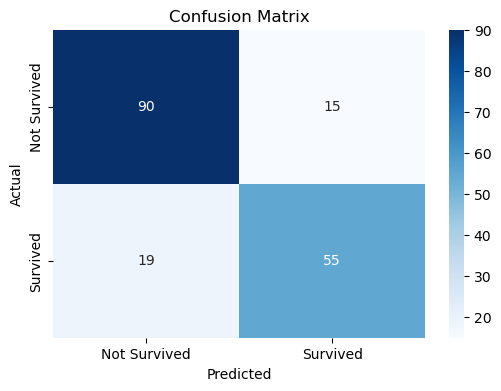

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()